# <centre>Zomato Restaurant Project</centre>



## Problem Statement:

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

### Data Storage:
This problem statement contains two datasets- <b>Zomato.csv</b> and <b>country_code.csv.
Country_code.csv</b> contains two variables:

- Country code
- Country name

The collected data has been stored in the Comma Separated Value file <b>Zomato.csv.</b> Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the
following variables:

- Restaurant Id: Unique id of every restaurant across various cities of the world
- Restaurant Name: Name of the restaurant
- Country Code: Country in which restaurant is located
- City: City in which restaurant is located
- Address: Address of the restaurant
- Locality: Location in the city
- Locality Verbose: Detailed description of the locality
- Longitude: Longitude coordinate of the restaurant&#39;s location
- Latitude: Latitude coordinate of the restaurant&#39;s location
- Cuisines: Cuisines offered by the restaurant
- Average Cost for two: Cost for two people in different currencies
- Currency: Currency of the country
- Has Table booking: yes/no
- Has Online delivery: yes/ no
- Is delivering: yes/ no
- Switch to order menu: yes/no
- Price range: range of price of food
- Aggregate Rating: Average rating out of 5
- Rating color: depending upon the average rating color
- Rating text: text on the basis of rating of rating
- Votes: Number of ratings casted by people

### Problem statement : In this dataset predict 2 things –
- 1) Average Cost for two
- 2) Price range

### Import Required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing  import  StandardScaler, PowerTransformer,LabelEncoder,power_transform
from imblearn.over_sampling import SMOTE
import pickle
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

/Users/aditya/opt/anaconda3/envs/datascience_env/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load Datasets

In [2]:
zomato_df=pd.read_csv('zomato.csv',encoding="latin-1")

In [3]:
#Fetching top 5 record
zomato_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
#Random sample record
zomato_df.sample()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
3002,1127,Castle 9,1,New Delhi,"B-45/47, 1st Floor, Near PVR Plaza, Connaught ...",Connaught Place,"Connaught Place, New Delhi",77.219498,28.634857,"Finger Food, Continental, North Indian, Chinese",...,Indian Rupees(Rs.),Yes,No,No,No,3,3.1,Orange,Average,1099


### Exploratorty Data Analysis

In [5]:
zomato_df.shape

(9551, 21)

In [7]:
# information about data
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
# static information about data
zomato_df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


### Checking Null values 

In [9]:
zomato_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
# Show column name if null value present 
for i in zomato_df.columns:
    if zomato_df[i].isnull().sum() !=0:
        print(f'{i} : ', zomato_df[i].isnull().sum())

Cuisines :  9


#### Observation
Cuisines having null values

<AxesSubplot:>

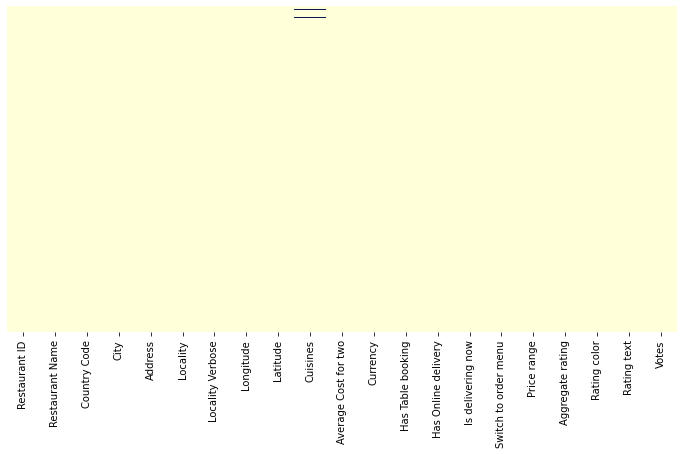

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(zomato_df.isnull(), cbar=False,yticklabels=False,cmap="YlGnBu")

### Now load Country dataset

In [12]:
country_df=pd.read_excel('Country-Code.xlsx')
country_df.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [13]:
country_df.columns

Index(['Country Code', 'Country'], dtype='object')

### Merge both country and zomato df in single datagrame

In [15]:
final_df=pd.merge(zomato_df,country_df,on='Country Code',how='left')
final_df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


In [17]:
# show the datatypes
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [18]:
final_df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [19]:
country_name=final_df.Country.value_counts().index
country_name

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [20]:
country_value=final_df.Country.value_counts().values
country_value

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

([<matplotlib.patches.Wedge at 0x7f8c4c12ee50>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.030157837943120734, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.392%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.735%'),
  Text(0.5997744629358018, -0.016449729787156763, '0.873%')])

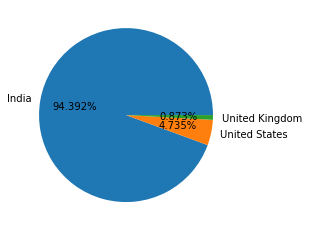

In [21]:
plt.pie(country_value[:3],labels=country_name[:3],autopct='%1.3f%%')

In [22]:
final_df.groupby(['Aggregate rating','Rating color','Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [23]:
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating counts'})
ratings

,Aggregate rating,Rating color,Rating text,Rating counts
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


### observation
- when rating is between `4.5` to `4.9` --------------->Excellent
- when rating is between `4.0` to `4.4`--------------->very good
- when rating is between `3.5`to `3.9`--------------->good
- when rating is between `3.0` to `3.4`--------------->average
- when rating is between `2.5` to `2.9`--------------->average
- when rating is between `2.0` to `2.4`--------------->poor

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating counts'>

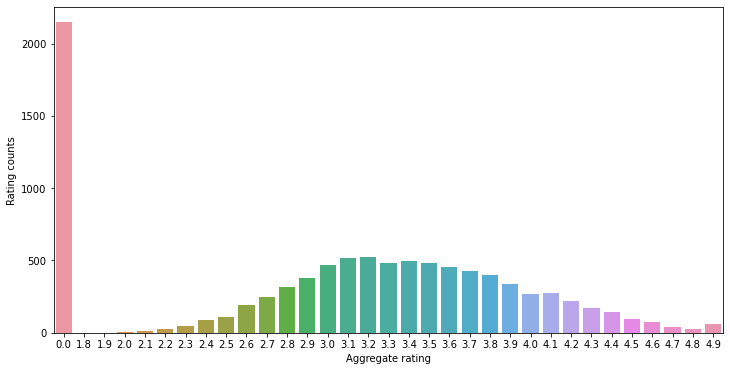

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x='Aggregate rating',y='Rating counts',data=ratings)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating counts'>

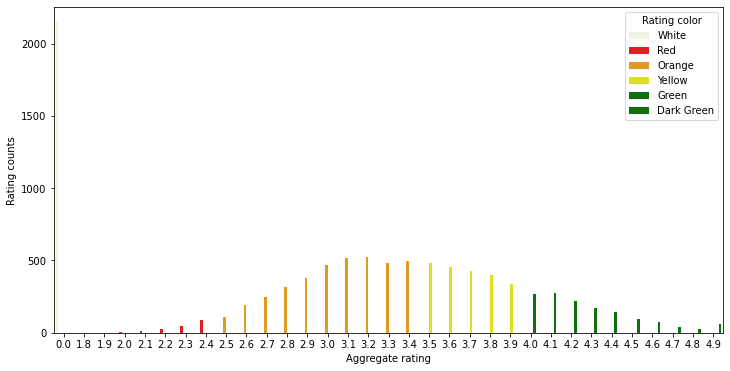

In [25]:
#palette is used to give color as per your reqiirement or color mapping
plt.figure(figsize=(12,6))
sns.barplot(x='Aggregate rating',y='Rating counts',data=ratings,hue='Rating color',palette=['beige','red','orange','yellow','green','green'])

#### Maximum number of rating are between 2.5 to 3.4

<AxesSubplot:xlabel='Rating color', ylabel='count'>

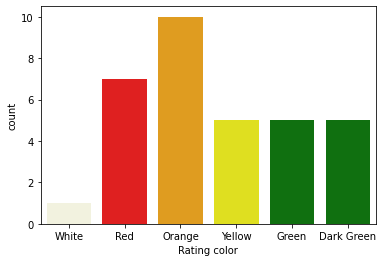

In [26]:
sns.countplot(x='Rating color',data=ratings,palette=['beige','red','orange','yellow','green','green'])

In [27]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [28]:
final_df.groupby(['Aggregate rating','Country']).size().reset_index().head()

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


In [29]:
final_df.groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


Maximum number of 0 ratings are from indian customers

In [30]:
final_df.groupby(['Country','Has Online delivery']).size().reset_index()

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


In [31]:
final_df[final_df['Has Online delivery']=='Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

online delivery in `INDIA` and `UAE`only from given dataset

In [32]:
final_df.groupby(['Has Online delivery']).size().reset_index()

,Has Online delivery,0
0,No,7100
1,Yes,2451


In [33]:
final_df.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', length=141)

In [34]:
city_value=final_df.City.value_counts().values
city_labels=final_df.City.value_counts().index

([<matplotlib.patches.Wedge at 0x7f8c4e497340>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029922, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.869%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.068%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.590%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.158%'),
  Text(0.5999706981848791, -0.005929698099289048, '0.315%')])

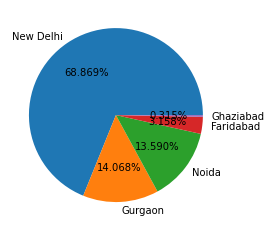

In [35]:
plt.pie(city_value[:5],labels=city_labels[:5],autopct='%1.3f%%')

In [36]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [37]:
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

## Label Encoding

In [38]:
enc = LabelEncoder()
for i in final_df.columns:
    if final_df[i].dtypes=="object":
        final_df[i]=enc.fit_transform(final_df[i].values.reshape(-1,1))

In [39]:
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,3749,162,73,8685,171,172,121.027535,14.565443,920,...,1,0,0,0,3,4.8,0,1,314,6
1,6304287,3173,162,73,6055,593,601,121.014101,14.553708,1111,...,1,0,0,0,3,4.5,0,1,591,6
2,6300002,2897,162,75,4684,308,314,121.056831,14.581404,1671,...,1,0,0,0,4,4.4,1,5,270,6
3,6318506,4707,162,75,8690,862,875,121.056475,14.585318,1126,...,0,0,0,0,4,4.9,0,1,365,6
4,6314302,5523,162,75,8689,862,875,121.057508,14.584450,1122,...,1,0,0,0,4,4.8,0,1,229,6


#### Checking dataset after transformation

In [40]:
final_df.dtypes

Restaurant ID             int64
Restaurant Name           int64
Country Code              int64
City                      int64
Address                   int64
Locality                  int64
Locality Verbose          int64
Longitude               float64
Latitude                float64
Cuisines                  int64
Average Cost for two      int64
Currency                  int64
Has Table booking         int64
Has Online delivery       int64
Is delivering now         int64
Switch to order menu      int64
Price range               int64
Aggregate rating        float64
Rating color              int64
Rating text               int64
Votes                     int64
Country                   int64
dtype: object

## Checking Correlation

In [41]:
final_df.corr()['Average Cost for two'].sort_values()

Latitude               -0.111088
Rating color           -0.049970
City                   -0.028838
Has Online delivery    -0.018974
Locality               -0.012136
Locality Verbose       -0.011852
Country                -0.004034
Is delivering now      -0.001862
Restaurant ID          -0.001693
Cuisines                0.005755
Has Table booking       0.007758
Restaurant Name         0.019241
Address                 0.022749
Rating text             0.031439
Country Code            0.043225
Currency                0.045615
Longitude               0.045891
Aggregate rating        0.051792
Votes                   0.067783
Price range             0.075083
Average Cost for two    1.000000
Switch to order menu         NaN
Name: Average Cost for two, dtype: float64

### Observation 
- All columns are sorted in ascending order showing least to strong correlation with target column.
- `9` columns are negatively correlated and `11` columns are positively correlated.
- Columm `Price range ` is highly correlated with Target column 'Average Cost for two' and  column `Latitude`  correlated with Target column 'Average Cost for two'

### Checking correlation with heatmap

<AxesSubplot:>

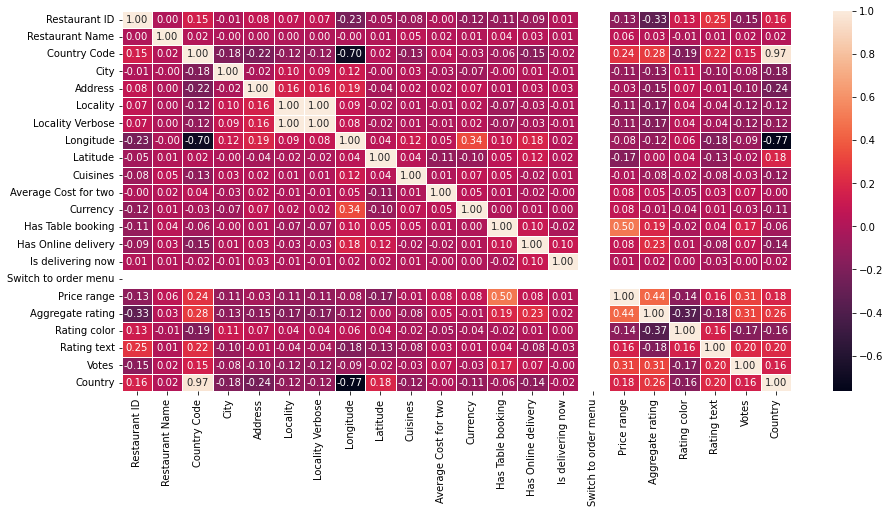

In [42]:
plt.figure(figsize=(15,7))
sns.heatmap(final_df.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')

## Checking Outliers

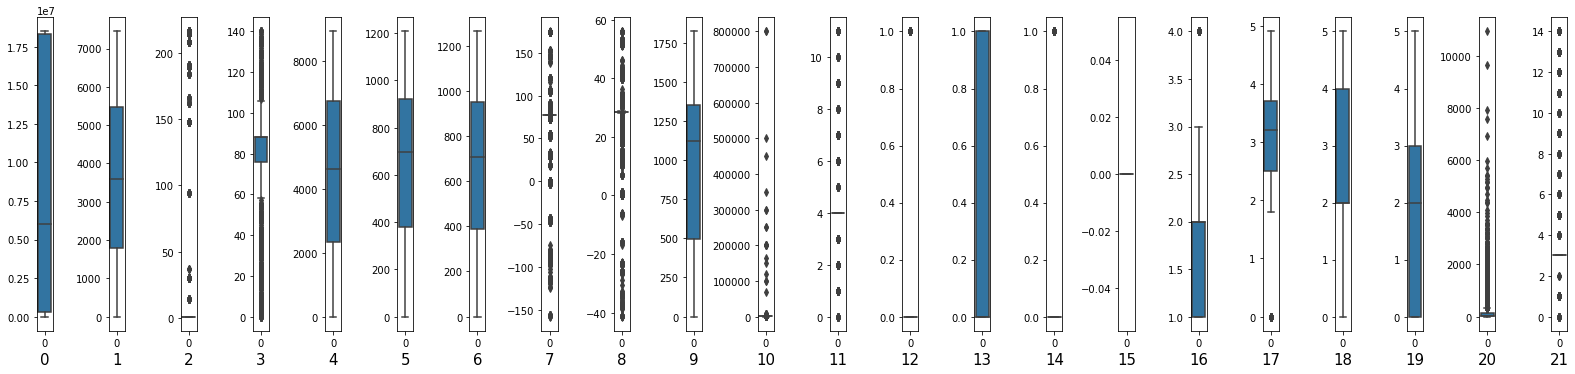

In [43]:
collist=final_df.columns.values
ncol=40
nrows=40
plt.figure(figsize=(ncol,5*ncol))
for column in range(0,len(collist)):
    y=column
    plt.subplot(nrows,ncol,column+1)
    sns.boxplot( data=final_df[collist[column]])
    plt.xlabel(column,fontsize = 15)
    plt.tight_layout()

We can see that many column having outliers

In [44]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

## Checking for the skewness

In [45]:
final_df.skew()

Restaurant ID            0.061570
Restaurant Name          0.044637
Country Code             3.043965
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Locality Verbose        -0.183064
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.305484
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
Country                  3.312721
dtype: float64

### Observation:
- Skewness threshold taken is +/-0.25
- All the columns are not normallly distributed, they are skewed.

###  Useing Data Visualization check skweness

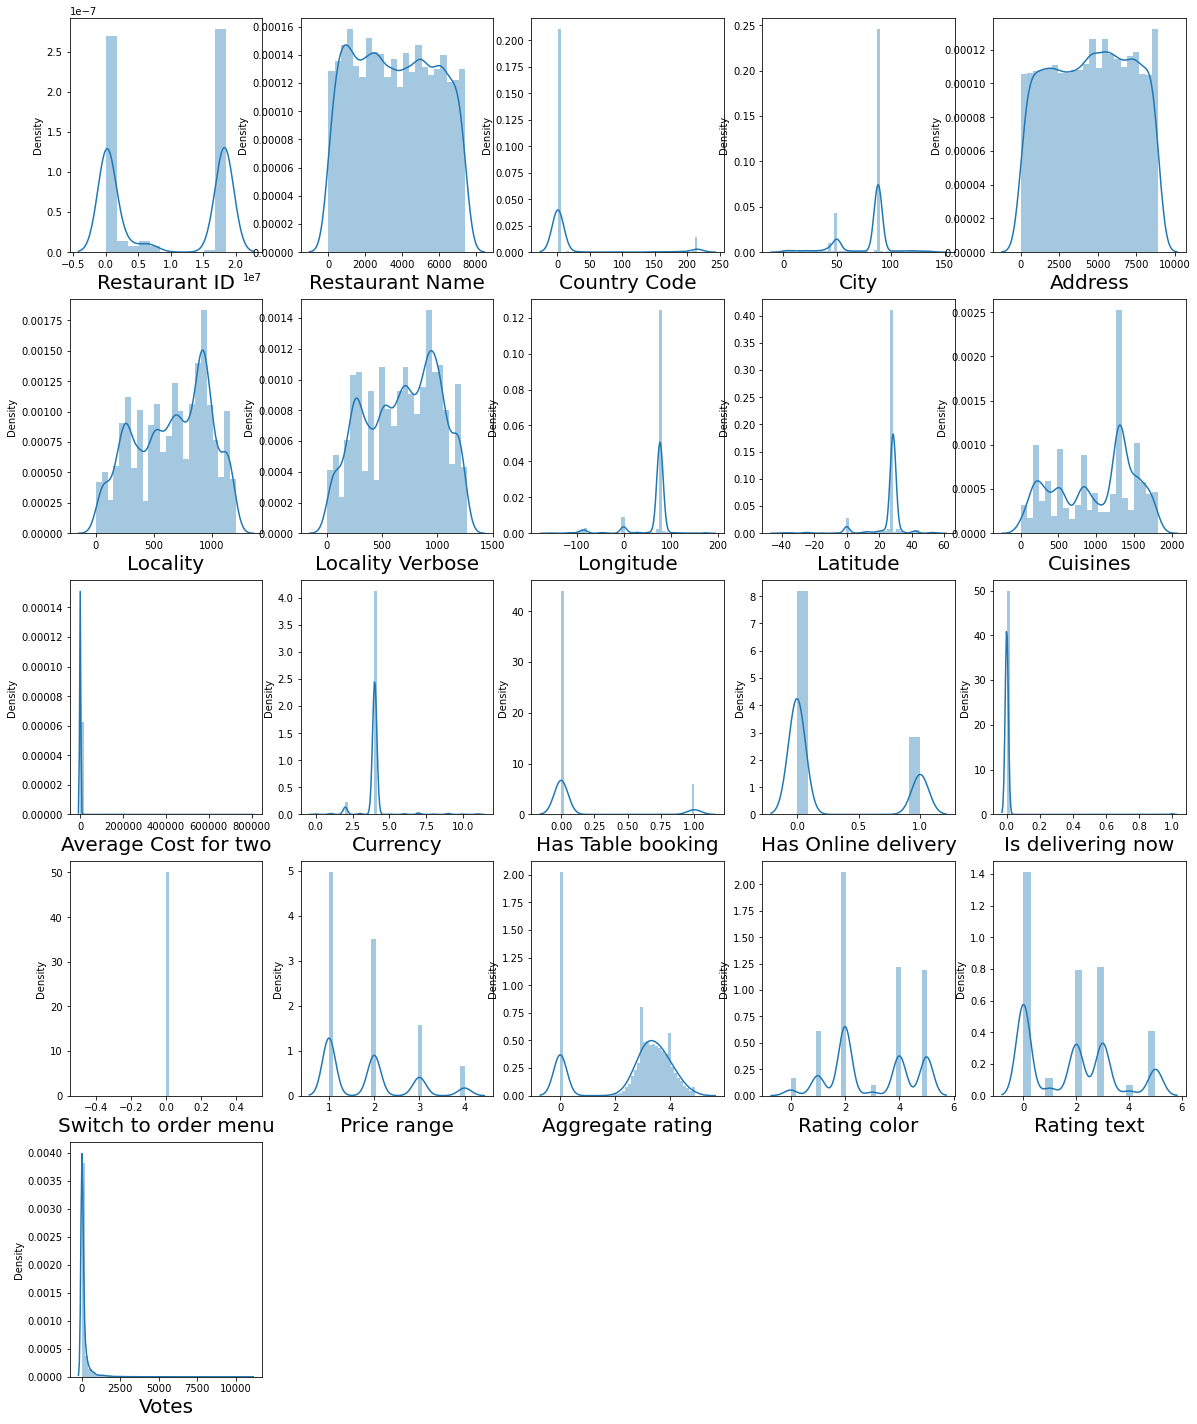

In [46]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in final_df:
    if plotnumber<=21:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(final_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We can see skewed data

### Removing skewness

In [47]:
collist=['Longitude','Latitude','Aggregate rating','Average Cost for two','Price range']
final_df[collist]=power_transform(final_df[collist],method='yeo-johnson')
final_df[collist]

,Longitude,Latitude,Aggregate rating,Average Cost for two,Price range
0,2.498033,-1.602771,1.833264,0.974401,1.284171
1,2.497306,-1.603989,1.506121,1.060687,1.284171
2,2.499617,-1.601115,1.400030,2.302484,1.706541
3,2.499598,-1.600709,1.945248,1.284065,1.706541
4,2.499653,-1.600799,1.833264,1.284065,1.706541
...,...,...,...,...,...
9546,-1.640540,2.270905,1.090715,-1.416818,1.284171
9547,-1.638445,2.268528,1.192320,-1.187274,1.284171
9548,-1.638664,2.276969,0.699460,-0.769920,1.706541
9549,-1.638619,2.277366,0.990620,-1.072964,1.706541


### checking skewness after removal

In [48]:
final_df.skew()

Restaurant ID            0.061570
Restaurant Name          0.044637
Country Code             3.043965
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Locality Verbose        -0.183064
Longitude               -0.803832
Latitude                -0.293200
Cuisines                -0.305484
Average Cost for two     0.142365
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.182963
Aggregate rating        -0.610806
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
Country                  3.312721
dtype: float64

### checking skewness after removal through data visualization using distplot

<AxesSubplot:xlabel='Average Cost for two', ylabel='Density'>

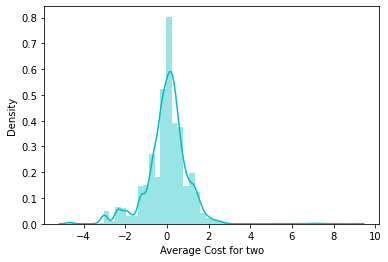

In [49]:
sns.distplot(final_df['Average Cost for two'],color='c')

The data is not normal but the skewness has got removed compared to the old data.

In [50]:
final_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,3749,162,73,8685,171,172,2.498033,-1.602771,920,...,1,0,0,0,1.284171,1.833264,0,1,314,6
1,6304287,3173,162,73,6055,593,601,2.497306,-1.603989,1111,...,1,0,0,0,1.284171,1.506121,0,1,591,6
2,6300002,2897,162,75,4684,308,314,2.499617,-1.601115,1671,...,1,0,0,0,1.706541,1.400030,1,5,270,6
3,6318506,4707,162,75,8690,862,875,2.499598,-1.600709,1126,...,0,0,0,0,1.706541,1.945248,0,1,365,6
4,6314302,5523,162,75,8689,862,875,2.499653,-1.600799,1122,...,1,0,0,0,1.706541,1.833264,0,1,229,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443,208,140,5926,517,523,-1.640540,2.270905,1813,...,0,0,0,0,1.284171,1.090715,1,5,788,11
9547,5908749,1311,208,140,5962,552,558,-1.638445,2.268528,1824,...,0,0,0,0,1.284171,1.192320,1,5,1034,11
9548,5915807,3069,208,140,5966,554,561,-1.638664,2.276969,1110,...,0,0,0,0,1.706541,0.699460,5,2,661,11
9549,5916112,513,208,140,5967,554,561,-1.638619,2.277366,1657,...,0,0,0,0,1.706541,0.990620,1,5,901,11


In [52]:
final_df.columns.tolist()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes',
 'Country']

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [56]:
X = final_df.drop(['Average Cost for two','Price range'], axis =1)
Y = final_df['Average Cost for two']

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (6685, 20)
Training target vector size: (6685,)
Test feature matrix size: (2866, 20)
Test target vector size: (2866,)


In [61]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

ValueError: Unknown label type: 'continuous'

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=90, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

ValueError: Unknown label type: 'continuous'